In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display
%matplotlib inline

# Chapter 3. Unsupervised Learning and Preprocessing

The second family of machine learning algorithms that we will discuss is unsupervised learning algorithms.  
Unsupervised learning subsumes all kinds of machine learning where there is no known output, no teacher to instruct the learning algorithm.  
In unsupervised learning, the learning algorithm is just shown the input data and asked to extract knowledge from this data.

## Types of Unsupervised Learning

We will look into two kinds of unsupervised learning in this chapter: transformations of the dataset and clustering.

**Unsupervised transformations** of a dataset are algorithms that create a new representation of the data which might be easier for humans or other machine learning algorithms to understand compared to the original representation of the data.  
A common application of unsupervised transformations is dimensionality reduction, which takes a high-dimensional representation of the data, consisting of many features, and finds a new way to represent this data that summarizes the essential characteristics with fewer features.  
A common application for dimensionality reduction is reduction to two dimensions for visualization purposes.  
Another application for unsupervised transformations is finding the parts or components that “make up” the data.  
An example of this is topic extraction on collections of text documents.  
Here, the task is to find the unknown topics that are talked about in each document, and to learn what topics appear in each document.  
This can be useful for tracking the discussion of themes like elections, gun control, or pop stars on social media.

**Clustering algorithms**, on the other hand, partition data into distinct groups of similar items.  
Consider the example of uploading photos to a social media site.  
To allow you to organize your pictures, the site might want to group together pictures that show the same person.  
However, the site doesn’t know which pictures show whom, and it doesn’t know how many different people appear in your photo collection.  
A sensible approach would be to extract all the faces and divide them into groups of faces that look similar.  
Hopefully, these correspond to the same person, and the images can be grouped together for you.

## Challenges in Unsupervised Learning

A major challenge in unsupervised learning is evaluating whether the algorithm learned something useful.  
Unsupervised learning algorithms are usually applied to data that does not contain any label information, so we don’t know what the right output should be.  
Therefore, it is very hard to say whether a model “did well.”  
For example, our hypothetical clustering algorithm could have grouped together all the pictures that show faces in profile and all the full-face pictures.  
This would certainly be a possible way to divide a collection of pictures of people’s faces, but it’s not the one we were looking for.  
However, there is no way for us to “tell” the algorithm what we are looking for, and often the only way to evaluate the result of an unsupervised algorithm is to inspect it manually.  
As a consequence, unsupervised algorithms are used often in an exploratory setting, when a data scientist wants to understand the data better, rather than as part of a larger automatic system.  
Another common application for unsupervised algorithms is as a preprocessing step for supervised algorithms.  
Learning a new representation of the data can sometimes improve the accuracy of supervised algorithms, or can lead to reduced memory and time consumption.
Before we start with “real” unsupervised algorithms, we will briefly discuss some simple preprocessing methods that often come in handy.  
Even though preprocessing and scaling are often used in tandem with supervised learning algorithms, scaling methods don’t make use of the supervised information, making them unsupervised.

## Preprocessing and Scaling

In the previous chapter we saw that some algorithms, like neural networks and SVMs, are very sensitive to the scaling of the data.  
Therefore, a common practice is to adjust the features so that the data representation is more suitable for these algorithms.  
Often, this is a simple per-feature rescaling and shift of the data.  
The following code (Figure 3-1) shows a simple example:

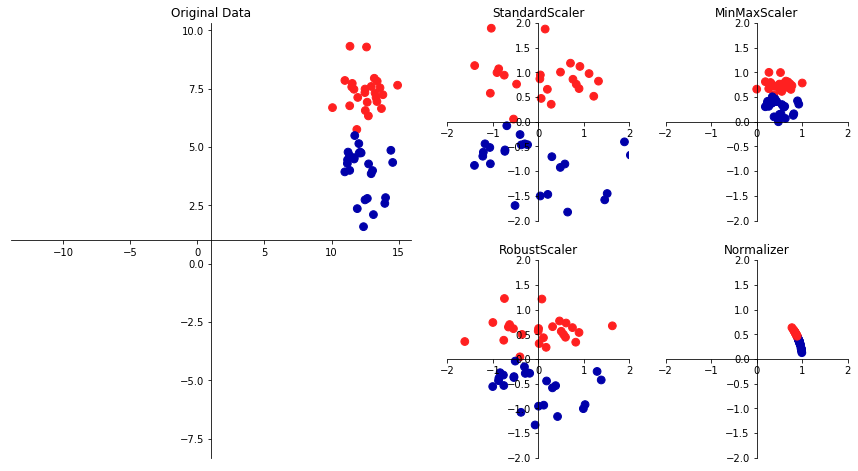

In [29]:
mglearn.plots.plot_scaling()

### Different Kinds of Preprocessing

The first plot in Figure 3-1 shows a synthetic two-class classification dataset with two features.  
The first feature (the x-axis value) is between 10 and 15.  
The second feature (the y-axis value) is between around 1 and 9.
The following four plots show four different ways to transform the data that yield more standard ranges.  
The [StandardScaler in scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) ensures that for each feature the mean is 0 and the variance is 1, bringing all features to the same magnitude.  
However, this scaling does not ensure any particular minimum and maximum values for the features.  
The [RobustScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html) works similarly to the `StandardScaler` in that it ensures statistical properties for each feature that guarantee that they are on the same scale.  
However, the `RobustScaler` uses the median and quartiles, instead of mean and variance.  
This makes the `RobustScaler` ignore data points that are very different from the rest (like measurement errors).  
These odd data points are also called outliers, and can lead to trouble for other scaling techniques.

The [MinMaxScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html), on the other hand, shifts the data such that all features are exactly between 0 and 1.  
For the two-dimensional dataset this means all of the data is contained within the rectangle created by the x-axis between 0 and 1 and the y-axis between 0 and 1.
Finally, the [Normalizer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html) does a very different kind of rescaling.  
It scales each data point such that the feature vector has a Euclidean length of 1.  
In other words, it projects a data point on the circle (or sphere, in the case of higher dimensions) with a radius of 1.  
This means every data point is scaled by a different number (by the inverse of its length).  
This normalization is often used when only the direction (or angle) of the data matters, not the length of the feature vector.

### Applying Data Transformations

Now that we’ve seen what the different kinds of transformations do, let’s apply them using `scikit-learn`.  
We will use the cancer dataset that we saw in Chapter 2.  
Preprocessing methods like the scalers are usually applied before applying a supervised machine learning algorithm.  
As an example, say we want to apply the kernel `SVM (SVC)` to the cancer dataset, and use `MinMaxScaler` for preprocessing the data.  
We start by loading our dataset and splitting it into a training set and a test set (we need separate training and test sets to evaluate the supervised model we will build after the preprocessing):

In [30]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=1)

print("X_train.shape: {}".format(X_train.shape))
print("X_test.shape: {}".format(X_test.shape))

X_train.shape: (426, 30)
X_test.shape: (143, 30)


As a reminder, the dataset contains 569 data points, each represented by 30 measurements.  
We split the dataset into 426 samples for the training set and 143 samples for the test set.  
As with the supervised models we built earlier, we first import the class that implements the preprocessing, and then instantiate that class:

In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

We then fit the scaler using the fit method, applied to the training data.  
For the `MinMaxScaler`, the fit method computes the minimum and maximum value of each feature on the training set.  
In contrast to the classifiers and regressors of Chapter 2, the scaler is only provided with the data (`X_train`) when fit is called, and `y_train` is not used:

In [32]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

To apply the transformation that we just learned -- that is, to actually *scale* the training data -- we use the `transform` method of the scaler.  
The `transform` method is used in `scikit-learn` whenever a model returns a new representation of the data:

In [33]:
# Transform the data:
X_train_scaled = scaler.transform(X_train)

# Print dataset properties before and after scaling:
print("Transformed shape: {}".format(X_train_scaled.shape))
print()
print("Per-feature minimum before scaling: \n{}".format(
                                   X_train.min(axis=0)))
print("Per-feature maximum before scaling: \n{}".format(
                                   X_train.max(axis=0)))
print()
print("Per-feature minimum after scaling: \n{}".format(
                           X_train_scaled.min(axis=0)))
print("Per-feature maximum after scaling: \n{}".format(
                           X_train_scaled.max(axis=0)))

Transformed shape: (426, 30)

Per-feature minimum before scaling: 
[  6.98100000e+00   9.71000000e+00   4.37900000e+01   1.43500000e+02
   5.26300000e-02   1.93800000e-02   0.00000000e+00   0.00000000e+00
   1.06000000e-01   5.02400000e-02   1.15300000e-01   3.60200000e-01
   7.57000000e-01   6.80200000e+00   1.71300000e-03   2.25200000e-03
   0.00000000e+00   0.00000000e+00   9.53900000e-03   8.94800000e-04
   7.93000000e+00   1.20200000e+01   5.04100000e+01   1.85200000e+02
   7.11700000e-02   2.72900000e-02   0.00000000e+00   0.00000000e+00
   1.56600000e-01   5.52100000e-02]
Per-feature maximum before scaling: 
[  2.81100000e+01   3.92800000e+01   1.88500000e+02   2.50100000e+03
   1.63400000e-01   2.86700000e-01   4.26800000e-01   2.01200000e-01
   3.04000000e-01   9.57500000e-02   2.87300000e+00   4.88500000e+00
   2.19800000e+01   5.42200000e+02   3.11300000e-02   1.35400000e-01
   3.96000000e-01   5.27900000e-02   6.14600000e-02   2.98400000e-02
   3.60400000e+01   4.95400000e+

The transformed data has the same shape as the original data -- the features are simply shifted and scaled.  
You can see that all of the features are now between 0 and 1, as desired.  
To apply the SVM to the scaled data, we also need to transform the test set.  
This is again done by calling the `transform` method, this time on `X_test`:

In [34]:
# Transform the test data:
X_test_scaled = scaler.transform(X_test)

# Print test data properties after scaling:
print("Per-feature minimum after scaling: \n{}".format(
                            X_test_scaled.min(axis=0)))
print()
print("Per-feature maximum after scaling: \n{}".format(
                            X_test_scaled.max(axis=0)))

Per-feature minimum after scaling: 
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]

Per-feature maximum after scaling: 
[ 0.9578778   0.81501522  0.95577362  0.89353128  0.81132075  1.21958701
  0.87956888  0.9333996   0.93232323  1.0371347   0.42669616  0.49765736
  0.44117231  0.28371044  0.48703131  0.73863671  0.76717172  0.62928585
  1.33685792  0.39057253  0.89612238  0.79317697  0.84859804  0.74488793
  0.9154725   1.13188961  1.07008547  0.92371134  1.20532319  1.63068851]


Maybe somewhat surprisingly, you can see that for the test set, after scaling, the minimum and maximum are not 0 and 1.  
Some of the features are even outside the 0–1 range!  
The explanation is that the `MinMaxScaler` (and all the other scalers) always applies exactly the same transformation to the training and the test set.  
This means the transform method always subtracts the training set minimum and divides by the training set range, which might be different from the minimum and range for the test set.

### Scaling Training and Test Data the Same Way

It is important to apply exactly the same transformation to the training set and the test set for the supervised model to work on the test set.  
The following example (Figure 3-2) illustrates what would happen if we were to use the minimum and range of the test set instead:

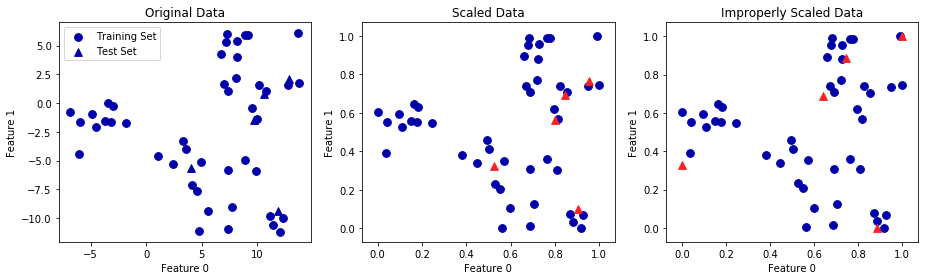

In [35]:
from sklearn.datasets import make_blobs

# Make synthetic data:
X, _ = make_blobs(n_samples=50, centers=5,
                  random_state=4, cluster_std=2)
# Split the data into training and test sets:
X_train, X_test = train_test_split(X, random_state=5, test_size=0.1)

# Plot the training and test sets:
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],
                c=mglearn.cm2(0), label="Training Set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
                c=mglearn.cm2(0), label="Test Set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")

# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Visualize the properly scaled data:
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2(0), label="Training Set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1],
                marker='^', c=mglearn.cm2(1), label="Test Set", s=60)
axes[1].set_title("Scaled Data")

# Rescale the test separately so test set min is 0 and max is 1.
# This example is for illustrative purposes only.
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# Visualize improperly scaled data:
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2(0), label="Training Set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
                marker='^', c=mglearn.cm2(1), label="Test Set", s=60)
axes[2].set_title("Improperly Scaled Data")

for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
fig.tight_layout()

The first panel is an unscaled two-dimensional dataset, with the training set shown as circles and the test set shown as triangles.  
The second panel is the same data, but scaled using the `MinMaxScaler`.  
Here, we called `fit` on the training set, and then called `transform` on the training and test sets.  
You can see that the dataset in the second panel looks identical to the first; only the ticks on the axes have changed.  
Now all the features are between 0 and 1.  
You can also see that the minimum and maximum feature values for the test data (the triangles) are not 0 and 1.
The third panel shows what would happen if we scaled the training set and test set separately.  
In this case, the minimum and maximum feature values for both the training and the test set are 0 and 1.  
But now the dataset looks different.  
The test points moved incongruously to the training set, as they were scaled differently.  
We changed the arrangement of the data in an arbitrary way.  
Clearly this is not what we want to do.

As another way to think about this, imagine your test set is a single point.  
There is no way to scale a single point correctly, to fulfill the minimum and maximum requirements of the `MinMaxScaler`.  
But the size of your test set should not change your processing.

**Shortcuts and Efficient Alternatives**  
Often, you want to fit a model on some dataset, and then transform it.  
This is a very common task, which can often be computed more efficiently than by simply calling `fit` and then `transform`.  
For this use case, all models that have a transform method also have a `fit_transform` method.  
Here is an example using `StandardScaler`:

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Call fit and transform in sequence using method chaining:
X_scaled = scaler.fit(X_train).transform(X_train)

# This code gives the same result with more efficient computation:
x_scaled_d = scaler.fit_transform(X_train)

While `fit_transform` is not necessarily more efficient for all models, it is still good practice to use this method when trying to transform the training set.

### The Effect of Preprocessing on Supervised Learning